<a href="https://colab.research.google.com/github/bagassandi270/CodingCamp/blob/main/Tugas_IR_Bagas%20Andianto_24.01.55.7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 pandas

Perintah `pip install requests beautifulsoup4 pandas` digunakan untuk menginstal tiga library Python yang diperlukan dalam pengambilan dan pengolahan data. Library `requests` berfungsi untuk mengambil data dari website melalui permintaan HTTP, `beautifulsoup4` digunakan untuk memproses dan mengekstrak informasi dari struktur HTML halaman web, sedangkan `pandas` digunakan untuk mengolah, menganalisis, dan menyimpan data dalam bentuk tabel. Perintah ini merupakan langkah awal yang penting sebelum melakukan web scraping dan analisis data.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# URL target
base_url = "https://www.inews.id/"

# Kirim request HTTP GET
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
response = requests.get(base_url, headers=headers)

if response.status_code == 200:
    print("Berhasil akses halaman utama!")
    html = response.text

    # Parse HTML
    soup = BeautifulSoup(html, "html.parser")

    # Cari list berita
    # (Ini berdasar tampilan halaman utama iNews, elemen <a> dengan link berita punya tag berita)
    items = []

    for a in soup.find_all("a"):
        href = a.get("href")
        text = a.get_text(strip=True)

        # Filter link yang mengarah ke berita
        if href and "/news/" in href:
            # Bikin full URL kalau perlu
            if href.startswith("/"):
                href = base_url[:-1] + href

            items.append({
                "title": text,
                "url": href
            })

    print(f"Jumlah berita ditemukan: {len(items)}")

    # Simpan ke file CSV
    df = pd.DataFrame(items)
    df.to_csv("inews_headlines.csv", index=False, encoding="utf-8")

    print("Selesai! Data tersimpan di inews_headlines.csv")
else:
    print("Gagal akses halaman. Status code:", response.status_code)


Berhasil akses halaman utama!
Jumlah berita ditemukan: 19
Selesai! Data tersimpan di inews_headlines.csv


Kode program ini digunakan untuk melakukan **web scraping sederhana pada website iNews** guna mengambil judul dan tautan berita dari halaman utamanya. Program dimulai dengan mengimpor library `requests` untuk mengirim permintaan HTTP, `BeautifulSoup` untuk memproses struktur HTML, `pandas` untuk mengolah dan menyimpan data dalam bentuk tabel, serta `time` sebagai pendukung jeda waktu jika diperlukan. Selanjutnya, program mengirim permintaan HTTP GET ke halaman utama iNews dengan menambahkan `User-Agent` agar request diterima oleh server. Jika koneksi berhasil (status code 200), HTML halaman diparse menggunakan BeautifulSoup, kemudian seluruh tag `<a>` ditelusuri untuk mencari link yang mengandung `/news/` sebagai penanda berita. Judul berita dan URL yang valid disimpan ke dalam list, lalu dikonversi menjadi DataFrame pandas dan disimpan ke file CSV bernama `inews_headlines.csv`. Jika halaman gagal diakses, program akan menampilkan pesan error sesuai kode respons.


In [ ]:
!pip install pandas numpy nltk sastrawi scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


Perintah `!pip install pandas numpy nltk sastrawi scikit-learn` digunakan untuk menginstal beberapa library Python yang dibutuhkan dalam proses **pengolahan teks dan analisis data**. Library `pandas` digunakan untuk mengelola dan menganalisis data dalam bentuk tabel, `numpy` berfungsi untuk perhitungan numerik dan operasi matriks, `nltk` digunakan untuk pemrosesan bahasa alami seperti tokenisasi dan stopword, `sastrawi` berfungsi khusus untuk proses stemming bahasa Indonesia, sedangkan `scikit-learn` digunakan untuk pembobotan kata (seperti TF-IDF) dan pembuatan model klasifikasi. Perintah ini biasanya dijalankan di Google Colab atau Jupyter Notebook sebagai tahap awal sebelum melakukan text mining dan analisis klasifikasi.


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Kode program ini digunakan untuk **menyiapkan lingkungan pemrosesan teks (text preprocessing)** pada Python. Library `pandas` dan `numpy` diimpor untuk membantu pengolahan dan manipulasi data, sedangkan `re` digunakan untuk pembersihan teks berbasis pola (regular expression). Library `nltk` digunakan untuk pemrosesan bahasa alami, khususnya `word_tokenize` untuk memecah teks menjadi kata (tokenisasi) dan `stopwords` untuk menghapus kata-kata umum yang tidak memiliki makna penting. Library `Sastrawi` digunakan untuk melakukan **stemming bahasa Indonesia**, yaitu mengubah kata ke bentuk dasarnya. Selanjutnya, `TfidfVectorizer` dari `scikit-learn` digunakan untuk mengubah teks menjadi representasi numerik berbasis bobot TF-IDF. Perintah `nltk.download('punkt')` dan `nltk.download('stopwords')` berfungsi untuk mengunduh data pendukung NLTK yang diperlukan agar proses tokenisasi dan penghapusan stopword dapat berjalan dengan baik.


In [ ]:
df = pd.read_csv("inews_headlines.csv")
df.head()


,title,url
0,InternasionalBreaking News: Amerika Serikat Se...,https://www.inews.id/news/internasional/breaki...
1,MegapolitanKAI Daop 1 Jakarta Prediksi Puncak ...,https://www.inews.id/news/megapolitan/kai-daop...
2,MegapolitanJasad 3 Orang di Jakut Selesai Diau...,https://www.inews.id/news/megapolitan/jasad-3-...
3,NasionalPipa Gas Meledak di Indragiri Hilir Ri...,https://www.inews.id/news/nasional/pipa-gas-me...
4,Internasional24 menit laluAmerika Serikat Sera...,https://www.inews.id/news/internasional/amerik...


Kode `df = pd.read_csv("inews_headlines.csv")` digunakan untuk **membaca file CSV** bernama *inews_headlines.csv* dan memuat isinya ke dalam sebuah **DataFrame pandas** bernama `df`. DataFrame ini memungkinkan data hasil scraping untuk diolah dan dianalisis dengan mudah. Selanjutnya, perintah `df.head()` digunakan untuk **menampilkan beberapa baris pertama** dari DataFrame (secara default 5 baris) guna memastikan bahwa data telah berhasil dimuat dan melihat struktur awal data, seperti kolom judul dan URL berita.


In [ ]:
def filtering(text):
    text = re.sub(r'http\S+', '', text)   # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', '', text) # hapus angka & simbol
    return text


Kode ini mendefinisikan fungsi `filtering(text)` yang digunakan untuk **membersihkan teks** sebelum diproses lebih lanjut. Baris pertama menggunakan *regular expression* (`re.sub`) untuk menghapus URL yang terdapat dalam teks, sedangkan baris kedua menghapus angka, tanda baca, dan simbol sehingga hanya menyisakan huruf dan spasi. Hasil dari proses ini adalah teks yang lebih bersih dan siap digunakan pada tahap tokenisasi dan analisis selanjutnya.


In [ ]:
def casefolding(text):
    return text.lower()


Kode ini mendefinisikan fungsi `casefolding(text)` yang digunakan untuk melakukan **case folding**, yaitu mengubah seluruh huruf dalam teks menjadi huruf kecil (lowercase). Proses ini bertujuan untuk menyamakan bentuk kata sehingga perbedaan huruf besar dan kecil tidak dianggap sebagai kata yang berbeda dalam tahap pemrosesan teks dan analisis selanjutnya.


In [ ]:
def tokenizing(text):
    return word_tokenize(text)


Kode ini mendefinisikan fungsi `tokenizing(text)` yang digunakan untuk melakukan **tokenisasi**, yaitu memecah teks menjadi unit-unit kata (token). Fungsi `word_tokenize` dari library NLTK digunakan untuk memisahkan kalimat berdasarkan spasi dan tanda baca, sehingga menghasilkan daftar kata yang dapat diproses lebih lanjut pada tahap penghapusan stopword, stemming, dan analisis teks.

In [ ]:
import nltk

nltk.download('stopwords') # Ensure stopwords are downloaded in this context

from nltk.corpus import stopwords # Import after download to ensure resource is available

stop_words = set(stopwords.words('indonesian'))

def stopword_removal(tokens):
    return [word for word in tokens if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kode ini digunakan untuk melakukan **penghapusan stopword** pada teks bahasa Indonesia. Pertama, modul `nltk` digunakan untuk mengunduh data *stopwords* agar tersedia pada lingkungan kerja. Selanjutnya, daftar stopword bahasa Indonesia dimuat dari NLTK dan disimpan dalam variabel `stop_words`. Fungsi `stopword_removal(tokens)` kemudian dibuat untuk menyaring token kata dengan cara menghapus kata-kata umum yang tidak memiliki makna penting, sehingga tersisa kata-kata yang lebih relevan untuk proses analisis teks selanjutnya.

In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

Kode ini digunakan untuk melakukan **stemming pada teks bahasa Indonesia**. Perintah `!pip install sastrawi` berfungsi untuk menginstal library **Sastrawi** yang menyediakan algoritma stemming khusus bahasa Indonesia. Selanjutnya, `StemmerFactory` digunakan untuk membuat objek stemmer yang bertugas mengubah kata berimbuhan menjadi kata dasar. Fungsi `stemming(tokens)` kemudian didefinisikan untuk menerapkan proses stemming pada setiap token kata, sehingga menghasilkan daftar kata dasar yang siap digunakan dalam tahap analisis teks selanjutnya.


In [1]:
def text_preprocessing(text):
    text = filtering(text)
    text = casefolding(text)
    tokens = tokenizing(text)
    tokens = stopword_removal(tokens)
    tokens = stemming(tokens)
    return " ".join(tokens)


Kode ini mendefinisikan fungsi `text_preprocessing(text)` yang berfungsi sebagai **tahapan lengkap praproses teks**. Fungsi ini secara berurutan melakukan pembersihan teks (filtering) untuk menghapus URL, angka, dan simbol, kemudian melakukan case folding dengan mengubah seluruh huruf menjadi huruf kecil. Setelah itu, teks dipecah menjadi kata-kata melalui tokenisasi, dilanjutkan dengan penghapusan stopword untuk menghilangkan kata umum yang tidak penting, serta stemming untuk mengubah kata menjadi bentuk dasarnya. Hasil akhir dari proses ini adalah teks bersih yang digabung kembali dalam satu string dan siap digunakan untuk analisis atau pembobotan kata.


In [ ]:
import nltk
nltk.download('punkt_tab')
df['clean_text'] = df['title'].astype(str).apply(text_preprocessing)
df[['title', 'clean_text']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Kode ini digunakan untuk menerapkan **proses praproses teks** pada data judul berita. Perintah `nltk.download('punkt_tab')` bertujuan memastikan resource NLTK yang dibutuhkan untuk proses tokenisasi tersedia pada lingkungan kerja. Selanjutnya, kolom `title` pada DataFrame `df` diubah ke tipe string untuk menghindari error, lalu setiap judul diproses menggunakan fungsi `text_preprocessing` dan hasilnya disimpan dalam kolom baru bernama `clean_text`. Perintah terakhir `df[['title', 'clean_text']].head()` digunakan untuk menampilkan beberapa baris pertama guna membandingkan teks asli dengan teks yang telah dibersihkan.


In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# Ubah ke DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head()


,ade,agresif,ancam,anggota,as,baik,bakar,banten,bawa,bekas,...,transformasi,trump,tuding,tumbuh,tuntut,uang,university,usut,wna,yudisial
0,0.0,0.0,0.0,0.37817,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.37817
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.272954,...,0.0,0.0,0.0,0.0,0.0,0.346913,0.0,0.0,0.0,0.00000


Kode ini digunakan untuk melakukan **pembobotan kata menggunakan metode TF-IDF**. Objek `TfidfVectorizer` dibuat untuk mengubah teks yang telah dipraproses pada kolom `clean_text` menjadi bentuk numerik. Fungsi `fit_transform` digunakan untuk mempelajari kosakata sekaligus menghitung bobot TF-IDF setiap kata pada seluruh dokumen, sehingga menghasilkan matriks TF-IDF. Matriks tersebut kemudian diubah menjadi DataFrame pandas dengan nama kolom berupa kata-kata hasil ekstraksi fitur. Perintah `tfidf_df.head()` digunakan untuk menampilkan beberapa baris pertama sebagai gambaran awal hasil pembobotan kata.


In [ ]:
tfidf_df.to_csv("tfidf_inews.csv", index=False)
print("TF-IDF berhasil disimpan!")


TF-IDF berhasil disimpan!


Kode ini digunakan untuk **menyimpan hasil pembobotan TF-IDF** ke dalam sebuah file CSV. Perintah `tfidf_df.to_csv("tfidf_inews.csv", index=False)` berfungsi menyimpan DataFrame TF-IDF ke file bernama *tfidf_inews.csv* tanpa menyertakan indeks baris. Selanjutnya, perintah `print("TF-IDF berhasil disimpan!")` digunakan untuk menampilkan pesan konfirmasi bahwa proses penyimpanan data telah berhasil dilakukan.


In [ ]:
def labeling(text):
    text = text.lower()
    if "presiden" in text or "pemilu" in text or "politik" in text:
        return "politik"
    elif "ekonomi" in text or "rupiah" in text or "inflasi" in text:
        return "ekonomi"
    elif "bola" in text or "liga" in text or "olahraga" in text:
        return "olahraga"
    elif "artis" in text or "film" in text or "musik" in text:
        return "hiburan"
    else:
        return "lainnya"

df['label'] = df['title'].apply(labeling)
df[['title','label']].head()


,title,label
0,Nasional7 Anggota Komisi Yudisial 2025-2030 Uc...,lainnya
1,NasionalOTT KPK di Kalsel Ternyata terkait Pem...,lainnya
2,NasionalBreaking News: KPK OTT Lagi! Tangkap 6...,lainnya
3,Nasional9 menit laluPresiden Prabowo Lantik 6 ...,politik
4,"Nasional13 menit laluOTT Bupati Bekasi, KPK Si...",ekonomi


Kode ini digunakan untuk melakukan **pelabelan atau klasifikasi sederhana** pada judul berita berdasarkan kata kunci tertentu. Fungsi `labeling(text)` bekerja dengan mengubah teks menjadi huruf kecil, kemudian mengecek keberadaan kata-kata kunci yang mewakili kategori tertentu, seperti *politik*, *ekonomi*, *olahraga*, dan *hiburan*. Jika judul mengandung kata kunci yang sesuai, maka fungsi akan memberikan label kategori tersebut, sedangkan judul yang tidak memenuhi kondisi akan diberi label *lainnya*. Hasil pelabelan kemudian disimpan ke dalam kolom baru bernama `label`, dan perintah terakhir digunakan untuk menampilkan beberapa data awal berupa judul berita beserta label kategorinya.


In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Kode ini digunakan untuk **membagi data menjadi data latih dan data uji** pada proses klasifikasi. Variabel `X` berisi teks berita yang telah dipraproses (`clean_text`), sedangkan `y` berisi label kategori berita. Fungsi `train_test_split` kemudian digunakan untuk membagi data dengan proporsi 80% sebagai data latih dan 20% sebagai data uji, dengan `random_state=42` agar hasil pembagian data konsisten setiap kali program dijalankan.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

Kode ini digunakan untuk membangun dan melatih **model klasifikasi teks** menggunakan metode *Naive Bayes*. `Pipeline` digunakan untuk menggabungkan dua tahap proses, yaitu pembobotan teks menggunakan `TfidfVectorizer` dan proses klasifikasi menggunakan algoritma `MultinomialNB`. Dengan pipeline ini, teks akan secara otomatis diubah menjadi representasi TF-IDF sebelum diklasifikasikan. Perintah `model.fit(X_train, y_train)` berfungsi untuk melatih model menggunakan data latih sehingga model dapat mempelajari pola hubungan antara teks berita dan label kategorinya.


In [ ]:
y_pred = model.predict(X_test)

hasil = pd.DataFrame({
    'Judul': df.loc[X_test.index, 'title'],
    'Label Asli': y_test,
    'Prediksi': y_pred
})

hasil.head()


,Judul,Label Asli,Prediksi
0,Nasional7 Anggota Komisi Yudisial 2025-2030 Uc...,lainnya,lainnya
1,NasionalOTT KPK di Kalsel Ternyata terkait Pem...,lainnya,lainnya
8,InternasionalMengenal Senjata Pemusnah Massal ...,lainnya,lainnya
5,Megapolitan17 menit laluPemprov DKI Jakarta Lu...,lainnya,lainnya


Kode ini digunakan untuk **melakukan prediksi dan menampilkan hasil klasifikasi**. Perintah `model.predict(X_test)` menghasilkan label prediksi untuk data uji berdasarkan model yang telah dilatih. Selanjutnya, hasil prediksi tersebut digabungkan dengan judul berita dan label aslinya ke dalam sebuah DataFrame bernama `hasil`, sehingga memudahkan perbandingan antara label sebenarnya dan label hasil prediksi. Perintah `hasil.head()` digunakan untuk menampilkan beberapa baris pertama sebagai contoh hasil klasifikasi.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Akurasi: 1.0

Classification Report:

              precision    recall  f1-score   support

     lainnya       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Kode ini digunakan untuk **mengevaluasi kinerja model klasifikasi**. Fungsi `accuracy_score` digunakan untuk menghitung tingkat akurasi, yaitu persentase prediksi yang benar dibandingkan dengan seluruh data uji. Selanjutnya, `classification_report` menampilkan ringkasan evaluasi model yang mencakup nilai *precision*, *recall*, *F1-score*, dan *support* untuk setiap kelas label. Hasil evaluasi ini membantu menilai seberapa baik model dalam mengklasifikasikan berita berdasarkan kategorinya.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


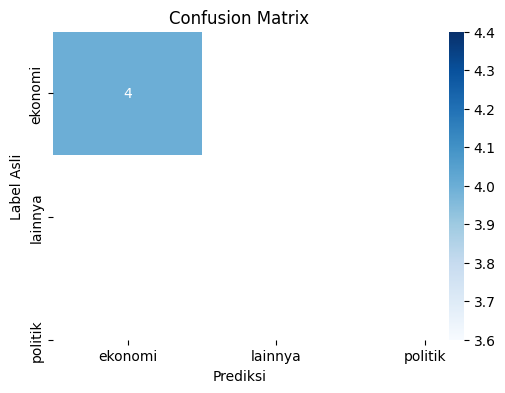

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Label Asli")
plt.title("Confusion Matrix")
plt.show()


Kode ini digunakan untuk **memvisualisasikan hasil evaluasi model klasifikasi dalam bentuk confusion matrix**. Pertama, confusion matrix dihitung menggunakan fungsi `confusion_matrix` berdasarkan label asli (`y_test`) dan hasil prediksi (`y_pred`). Selanjutnya, matriks tersebut divisualisasikan menggunakan *heatmap* dari library Seaborn agar lebih mudah dibaca. Sumbu horizontal menunjukkan label hasil prediksi, sedangkan sumbu vertikal menunjukkan label asli, dengan judul dan keterangan sumbu yang jelas. Visualisasi ini membantu melihat secara langsung jumlah prediksi yang benar maupun salah untuk setiap kelas.



Hasil output tersebut menunjukkan **confusion matrix yang tidak normal** karena **data uji (`y_test`) dan hasil prediksi (`y_pred`) hanya mengandung satu label saja**, yaitu **“ekonomi”**. Hal ini ditandai oleh *warning* dari scikit-learn yang menyatakan bahwa hanya satu label yang ditemukan, sehingga bentuk confusion matrix menjadi 1×1, bukan matriks penuh antar kelas.

Pada visualisasi confusion matrix, terlihat hanya **satu kotak bernilai 4**, yang berarti **empat data berita berlabel “ekonomi” berhasil diprediksi dengan benar sebagai “ekonomi”**. Tidak ada kesalahan klasifikasi dan tidak ada data dari kelas lain seperti *politik* atau *lainnya* pada data uji, sehingga baris dan kolom kelas lain kosong.

Kesimpulannya, **model tampak sangat akurat pada data uji**, namun **evaluasi ini belum representatif**, karena data uji tidak mengandung variasi kelas. Untuk mendapatkan confusion matrix yang lebih informatif, data perlu dibagi secara seimbang atau dipastikan bahwa `y_test` memuat lebih dari satu kategori label.
